###Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset




In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#dataset = pd.read_csv('./drive/MyDrive/Project2_Sentiment_Analysis/a1_RestaurantReviews_HistoricDump.tsv', delimiter = '\t', quoting = 3)

In [4]:
dataset = pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv', sep='\t')

In [5]:
dataset.shape

(900, 2)

In [6]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
dataset['Liked'].value_counts()

1    496
0    404
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

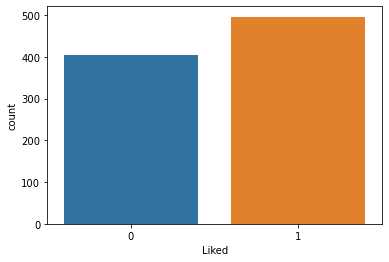

In [8]:
sns.countplot(x ='Liked', data = dataset)

### Data cleaning

In [9]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12AU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus=[]

for i in range(0, 900):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [11]:
corpus[:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

### Data transformation

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [13]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [14]:
# Saving BoW dictionary to later use in prediction
import pickle
#bow_path = './drive/MyDrive/Project2_Sentiment_Analysis/c1_BoW_Sentiment_Model.pkl'
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Model fitting (Logistic Regression)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model_lr =LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred_lr = model_lr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc_lr = '{:.2f}'.format(accuracy_score(y_test, y_pred_lr))
print('Accuracy Score : {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix : \n", cm_lr)

Accuracy Score : 0.78
Confusion Matrix : 
 [[ 68  29]
 [ 20 108]]


In [20]:
import joblib
joblib.dump(model_lr, 'c4_Classifier_Sentiment_Model_LogR')

['c4_Classifier_Sentiment_Model_LogR']

### Model fitting (Naive Bayes)

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

###Model performance

In [22]:
y_pred = classifier.predict(X_test)


In [23]:
acc_nb = '{:.2f}'.format(accuracy_score(y_test, y_pred))
print('Accuracy Score : {:.2f}'.format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)

Accuracy Score : 0.79
Confusion Matrix : 
 [[81 16]
 [32 96]]


In [24]:
# Exporting NB Classifier to later use in prediction
import joblib
#joblib.dump(classifier, './drive/MyDrive/Project2_Sentiment_Analysis/c2_Classifier_Sentiment_Model') 
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

['c2_Classifier_Sentiment_Model']

## Model Fitting (Random Forest Classifier)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model_rf= RandomForestClassifier(n_estimators= 501, criterion='entropy')

In [27]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [28]:
# Predicting the Test set results
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0], dtype=int64)

In [29]:
acc_rf = '{:.2f}'.format(accuracy_score(y_pred_rf,y_test))
print('Accuracy Score :{:.2f}'.format(accuracy_score(y_pred_rf,y_test)))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix : \n", cm_rf)

Accuracy Score :0.80
Confusion Matrix : 
 [[ 75  22]
 [ 22 106]]


In [30]:
joblib.dump(model_rf, 'c3_Classifier_Sentiment_Model_RandomForest')

['c3_Classifier_Sentiment_Model_RandomForest']

## Accuracy Comparison

In [31]:
acc_data = [['Logistic Regression',acc_lr ], ['Gaussian NB', acc_nb], ['Randon Forest', acc_rf]]


In [32]:
acc_df = pd.DataFrame(acc_data,columns=['Models', 'Accuracy'])
acc_df

,Models,Accuracy
0,Logistic Regression,0.78
1,Gaussian NB,0.79
2,Randon Forest,0.80


In [33]:
acc_df.to_csv('Models-Accuracy Comparison.tsv', sep='\t', encoding='UTF-8', index=False )